In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn

### Import pandas, numpy, matplotlib and sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

### Importing dataset to your code
1. read .csv file by pandas library
2. use **describe()** and **head()** functions look over dataset
3. plot **mean** and **variance** of data

                x             y
count  442.000000  4.420000e+02
mean   220.500000 -8.036558e-16
std    127.738666  4.761905e-02
min      0.000000 -9.027530e-02
25%    110.250000 -3.422907e-02
50%    220.500000 -7.283766e-03
75%    330.750000  3.124802e-02
max    441.000000  1.705552e-01
   x         y
0  0  0.061696
1  1 -0.051474
2  2  0.044451
3  3 -0.011595
4  4 -0.036385
5  5 -0.040696
6  6 -0.047163
7  7 -0.001895
8  8  0.061696
9  9  0.039062


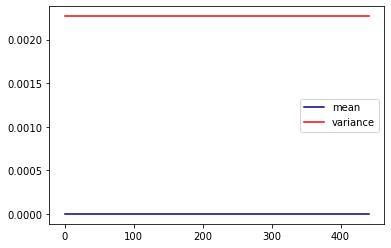

In [3]:
datasheet = pd.read_csv(r'bmi.csv')
datasheet.columns = ['x', 'y']

print(datasheet.describe())
print(datasheet.head(10))

y_mean = [datasheet.mean().y] * len(datasheet.x)
y_var = [(datasheet.std().y)**2] * len(datasheet.x)
plt.plot(datasheet.x, y_mean, label='mean', color='#000075')
plt.plot(datasheet.x, y_var, label='variance', color='red')
plt.legend()
plt.show()

### Split data
1. using sklearn.model_selection to split your dataset (80% for training)
  * you can use numpy for spliting too

In [4]:
#Task2
x_train, x_test, y_train, y_test = train_test_split(datasheet.x, datasheet.y, train_size=0.8)

### Linear Regression class
1. complete **fit** method
2. complete **predict** method
3. complete **mean squared error (MSE)** method

In [5]:
#Task3
class Linear_Regression:
    def __init__(self):
        self.x = None
        self.y = None
        self.alpha0 = None
        self.alpha1 = None
        self.coeffients = []
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
        x_avg = np.mean(self.x)
        y_avg = np.mean(self.y)
        
        temp_1 = 0
        temp_2 = 0
        for i in range(len(x)):
            temp_1 += ((x[i] - x_avg) * (y[i] - y_avg))
            temp_2 += ((x[i] - x_avg)**2)
        
        self.alpha1 = temp_1 / temp_2 
        self.alpha0 = y_avg - self.alpha1 * x_avg
        
        self.coeffients = [self.alpha0, self.alpha1]
        return self
    
    def predict(self, x):
        y = [0] * len(x)
        for i in range(len(x)):
            y[i] = self.alpha0 + self.alpha1 * x[i]
        return y
    
    def mse(self, x, y):
        n = len(x)
        temp = 0
        for i in range(len(x)):
            temp += ((y[i] - x[i])**2)
        MSE = temp / n
        return MSE

### Use dataset to create sample Linear regression
1. create new instance of Linear_Regression class
2. import x_train and y_train parts to fit method
3. predict new y by using x_test and predict method
4. now find how much is your MSE

In [6]:
LR = Linear_Regression()
model = LR.fit(x_train.to_numpy(), y_train.to_numpy())
predicted_values = model.predict(x_test.to_numpy())
error = model.mse(predicted_values, y_test.to_numpy())
print(error)

0.0021796331875754828


### Plot data and the line
1. use scatter plot to plot dataset
2. plot regression line with another color

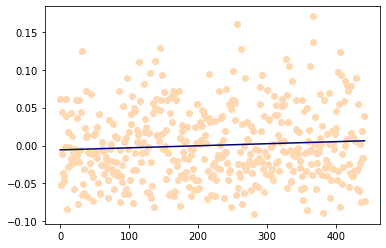

In [7]:
#Task5
plt.scatter(datasheet.x, datasheet.y, color='#ffd8b1')
x_vals = datasheet.x.to_numpy()
y_vals = model.predict(x_vals)
plt.plot(x_vals, y_vals, color='#000075')